# Graficos de productos grillados

En el siguiente **Jupiter Notebook** encontrá un ejemplo de generación de figuras asocciados a datos de reanálisis de **[era5](https://cds.climate.copernicus.eu/cdsapp#!/home)**.

Para mayor información respecto a la elaboración de mapas con datos grillados puede consultar [ejemplos cartopy](https://scitools.org.uk/cartopy/docs/latest/gallery/index.html) y opciones adicionales de matplotlib puede visitar [ejemplos matplotlib](https://matplotlib.org/stable/gallery/index.html).

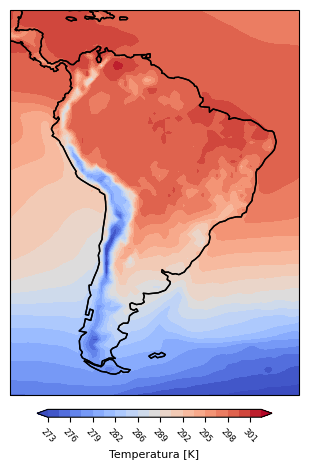

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
import cartopy.feature as cfeature
from matplotlib.ticker import FuncFormatter

current_dir = os.path.abspath(".")
parent_dir = os.path.dirname(current_dir)
data_dir = os.path.join(parent_dir, "data", "era5","stadistics", "2m_temperature_yearly_mean_1_deg.nc")

data = xr.open_dataset(data_dir)

fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize=(5, 5), subplot_kw={'projection': ccrs.PlateCarree()})


## ejemplo de formato de eqtiquetas en colorbar
def format_custom(x, pos):
   
    if x == 0:  
        return "0"
    elif abs(x) > 1: 
        return "{:.0f}".format(x)
    elif abs(x) < 0.01:  
        return "{:.3f}".format(x)
    else:
        return "{:.1f}".format(x)
    
lat = data.lat.values
lon = data.lon.values
X, Y = np.meshgrid(lon, lat)
levels_cbar1 = np.linspace(273, 303, 20)

resolution = '110m'
category = 'physical'
name = 'coastline'

feature = cfeature.NaturalEarthFeature(category, name, resolution, edgecolor='black', facecolor='none')
axs.add_feature(feature)
axs.coastlines()
axs.set_extent([-90, -30, -60, 20], crs=ccrs.PlateCarree())
contour1 = axs.contourf(X, Y, data["t2m"][0,:,:], levels=levels_cbar1, transform=ccrs.PlateCarree(), cmap="coolwarm", extend="both")
cbar1 = fig.colorbar(contour1, ax=axs, location='bottom', shrink=0.5, aspect=30, pad=0.03)
cbar1.ax.tick_params(labelsize=6)
cbar1.set_label("Temperatura [K]", fontsize=8)
cbar1.formatter = FuncFormatter(format_custom)

cbar1.set_ticks(cbar1.ax.get_xticks()) 
cbar1.ax.set_xticklabels(cbar1.ax.get_xticklabels(), rotation=315)

fig.tight_layout()  
dir_fig = os.path.join(parent_dir, "data", "era5","figures", "temperature_map.png")
fig.savefig(dir_fig, dpi=400)

Elaboración de figura con las variables meteorologícas restantes. Se sugiere revisar la [siguiente documentación](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.quiver.html) para obtener mayor información respecto a la elaboración de vectores en figuras de **Python**.

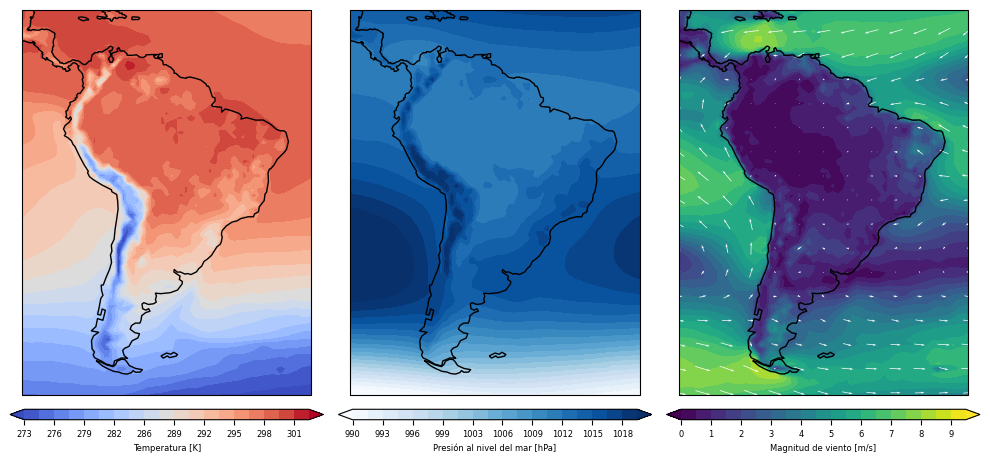

In [9]:
fig2, axs2 = plt.subplots(nrows = 1, ncols = 3, figsize=(10, 5), subplot_kw={'projection': ccrs.PlateCarree()})

variables = {
    "2m_temperature":{"tag":"t2m",
                      "up_val":303,
                      "low_val":273,
                      "title": "Temperatura [K]",
                      "cmap_color":"coolwarm",
                      "factor":1
                      },
    "mean_sea_level_pressure":{"tag":"msl",
                      "up_val":1020,
                      "low_val":990,
                      "title": "Presión al nivel del mar [hPa]",
                      "cmap_color":"Blues",
                      "factor":1/100
                      },
    "wind_speed":{"tag":"wind_speed",
                      "up_val":10,
                      "low_val":0,
                      "title": "Magnitud de viento [m/s]",
                      "cmap_color":"viridis",
                      "factor":1
                      },
}

for index, (variable_name, variable_attrs) in enumerate(variables.items(), start=0):
    #print(variable_name)
    data_dir = os.path.join(parent_dir, "data", "era5","stadistics", variable_name+"_yearly_mean_1_deg.nc")
    data = xr.open_dataset(data_dir)
    
    lat = data.lat.values
    lon = data.lon.values
    X, Y = np.meshgrid(lon, lat)
    levels_cbar = np.linspace(variable_attrs["low_val"], variable_attrs["up_val"], 20)
    
    axs.add_feature(feature)
    axs2[index].coastlines()
    axs2[index].set_extent([-90, -30, -60, 20], crs=ccrs.PlateCarree())
    contour = axs2[index].contourf(X, Y, data[variable_attrs["tag"]][0,:,:]*variable_attrs["factor"], levels=levels_cbar, transform=ccrs.PlateCarree(), cmap=variable_attrs["cmap_color"], extend="both")
    cbar = fig2.colorbar(contour, ax=axs2[index], location='bottom', shrink=1, aspect=30, pad=0.03)
    cbar.ax.tick_params(labelsize=6)
    cbar.set_label(variable_attrs["title"], fontsize=6)
    cbar.formatter = FuncFormatter(format_custom)
  


dir_u = os.path.join(parent_dir, "data", "era5","stadistics", "10m_u_component_of_wind_yearly_mean_1_deg.nc")
data_u = xr.open_dataset(dir_u)

dir_v = os.path.join(parent_dir, "data", "era5","stadistics", "10m_v_component_of_wind_yearly_mean_1_deg.nc")
data_v = xr.open_dataset(dir_v)

data_u = data_u["u10"][0,:,:]
data_v = data_v["v10"][0,:,:]

quiver = axs2[2].quiver(X[::5, ::5], 
                        Y[::5, ::5], 
                        data_u[::5, ::5], 
                        data_v[::5, ::5],
               pivot='mid', units='inches', color="white", scale=50)
fig2.tight_layout()  
dir_fig = os.path.join(parent_dir, "data", "era5","figures", "variables_map.png")
fig2.savefig(dir_fig, dpi=400)

La anomalía en este caso particular se define como: $T_{anom} = T_{dic} - \overline{T}$, donde $T_{anom}$ corresponde a la anomalía de diciembre para el caso de ejemplo. $\overline{T}$ Corresponde al promedio anual de los datos calculado con **CDO** y $T_{dic}$: corresponde a la temperatura en diciembre.

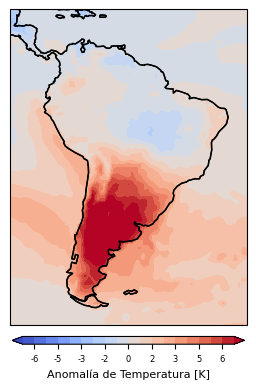

In [11]:
dir_mean = os.path.join(parent_dir, "data", "era5","stadistics", "2m_temperature_yearly_mean_1_deg.nc")
data_mean = xr.open_dataset(dir_mean)

dir_dec = os.path.join(parent_dir, "data", "era5","stadistics", "2m_temperature_dec_1_deg.nc")
data_dec = xr.open_dataset(dir_dec)
fig3, axs3 = plt.subplots(nrows = 1, ncols = 1, figsize=(5, 5), subplot_kw={'projection': ccrs.PlateCarree()})


lat = data_mean.lat.values
lon = data_mean.lon.values
X, Y = np.meshgrid(lon, lat)
levels_cbar = np.linspace(-7, 7, 19)    
axs3.add_feature(feature)
axs3.coastlines()
axs3.set_extent([-90, -30, -60, 20], crs=ccrs.PlateCarree())
contour = axs3.contourf(X, Y, data_dec["t2m"][0,:,:] - data_mean["t2m"][0,:,:], levels=levels_cbar, transform=ccrs.PlateCarree(), cmap="coolwarm", extend="both")
cbar = fig3.colorbar(contour, ax=axs3, location='bottom', shrink=0.6, aspect=30, pad=0.03)
cbar.ax.tick_params(labelsize=6)
cbar.set_label("Anomalía de Temperatura [K]", fontsize=8)
cbar.formatter = FuncFormatter(format_custom)

dir_fig = os.path.join(parent_dir, "data", "era5","figures", "temperature_anomaly_map.png")
fig3.savefig(dir_fig, dpi=400)

Finalmente se extraerán series de tiempo de temperatura de diversas ciudades de América del Sur provenientes de los datos de temperatura de reanálisis (*2m_temperature.nc*), las ciudades a extraer datos se encuentra en el diccionario **city_coords**. Para ello se define la función **near** que se encarga de extraer el indice más cercano para una cierta latitud/longitud. Para verificar que los valores de latitud y longitud son correctos para las diversas ciudades son graficados en un mapa. Y finalmente las series de tiempo generadas son almacenadas en un **Dataframe** para ser almacenadas en un archivo **csv**.

[268.49753 267.29492 269.59033 269.083   271.7211  276.5498  279.24942
 279.32925 277.30496 274.3658  274.5987  268.58734]
[276.18884 275.23743 277.46796 276.9623  278.98993 280.9261  282.42807
 282.99695 282.48297 280.5352  280.5568  275.67654]
[270.13425 269.79993 271.91403 271.598   273.64893 276.83423 279.70352
 280.56345 279.0914  276.5099  276.14893 270.73306]
[268.2796  266.96722 269.26266 268.79025 271.45496 276.33524 279.0997
 278.97827 277.07376 274.08636 274.32257 268.2397 ]
[268.2796  266.96722 269.26266 268.79025 271.45496 276.33524 279.0997
 278.97827 277.07376 274.08636 274.32257 268.2397 ]
[273.31958 273.0734  275.5551  274.79495 276.6213  278.86353 281.86588
 282.1819  281.29865 278.90176 279.0282  273.23474]
[275.605   274.82657 277.15027 276.2853  278.50757 280.56345 282.18024
 282.8173  282.2135  280.23413 280.35553 275.279  ]
[270.01947 269.26932 271.3019  270.85947 273.19815 276.8542  279.53885
 280.4836  278.60236 276.07407 275.77136 270.3089 ]
[271.93234 271.789

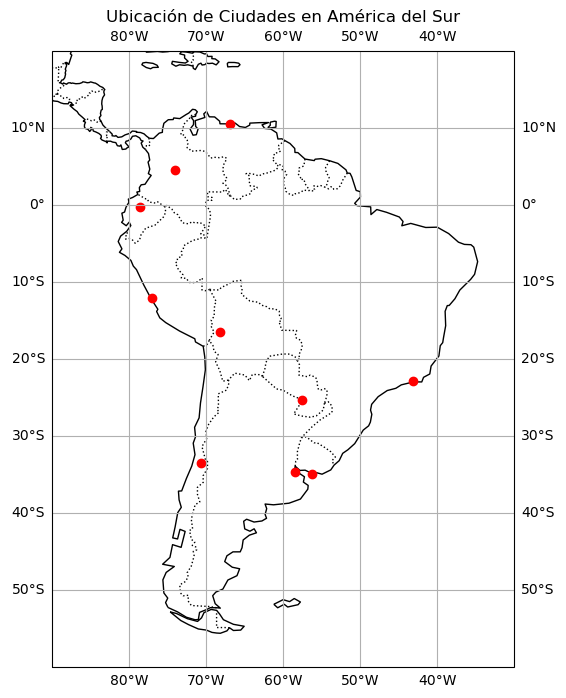

In [13]:
import pandas as pd

city_coords = {
    "Santiago de Chile": {"lat": -33.4489, "lon": -70.6693},
    "Bogotá": {"lat": 4.6097, "lon": -74.0817},
    "Río de Janeiro": {"lat": -22.9068, "lon": -43.1729},
    "Buenos Aires": {"lat": -34.6118, "lon": -58.4173},
    "Montevideo": {"lat": -34.9011, "lon": -56.1872},
    "Lima": {"lat": -12.0464, "lon": -77.0428},
    "Quito": {"lat": -0.2295, "lon": -78.5243},
    "Asunción": {"lat": -25.2637, "lon": -57.5759},
    "La Paz": {"lat": -16.5000, "lon": -68.1500},
    "Caracas": {"lat": 10.4880, "lon": -66.8792},
}


data_dir = os.path.join(parent_dir, "data", "era5", "2m_temperature.nc")

data = xr.open_dataset(data_dir)
time = data["time"].values
t2m = data["t2m"]

def near(array,value):
    idx = (np.abs(array-value)).argmin()
    return idx


fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([-90, -30, -60, 20], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.COASTLINE, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='black')


ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

temp_data = {}

for city, coords in city_coords.items():
    
    idx_lat = near(lat, coords["lat"])
    idx_lon = near(lon, coords["lon"])
    
    temp_values = t2m[:, idx_lat, idx_lon].values
    print(temp_values)
    plt.plot(coords["lon"], coords["lat"], 'ro', markersize=6, label=city)
    
    temp_values = t2m[:, idx_lat, idx_lon].values
    temp_data[city] = temp_values


plt.xlabel('Longitud (lon)')
plt.ylabel('Latitud (lat)')
plt.title('Ubicación de Ciudades en América del Sur')
plt.show()


df = pd.DataFrame(temp_data)
df.set_index(time, inplace=True)
df.index = pd.to_datetime(df.index)

dir_dataframe = os.path.join(parent_dir, "data", "era5", "results", "city_temperatures.csv")
df.to_csv(dir_dataframe)